In [56]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import numpy as np
import string
import re
from cust_stop_words import *
from textblob import TextBlob as tb
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### most_common_n_dict is a dictionary generated by Word_Counter.ipynb

In [57]:
filename = 'most_common_n_dict'

In [58]:
# Load the data frame
infile = open(filename, 'rb')
most_common_n_dict = pickle.load(infile)
infile.close()

In [59]:
most_common_n_dict.keys()

dict_keys(['easy', 'hard', 'med'])

In [60]:
easy_wc_list = most_common_n_dict['easy']
med_wc_list = most_common_n_dict['med']
hard_wc_list = most_common_n_dict['hard']

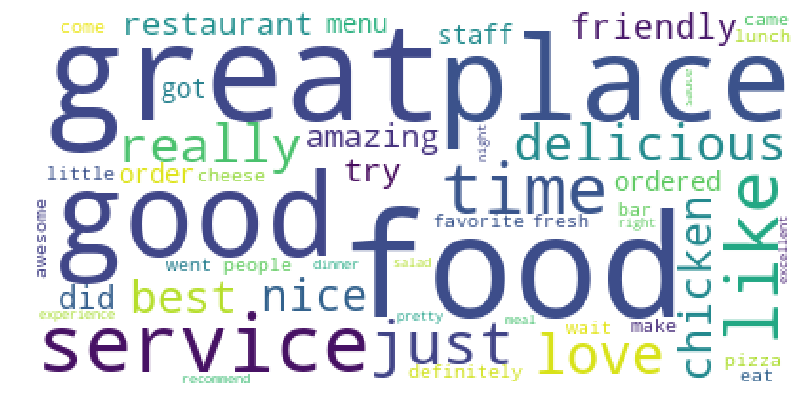

In [61]:
wordcloud = WordCloud(background_color="white")
wordcloud.fit_words(dict(easy_wc_list))

fig=plt.figure(figsize=(15, 7)) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

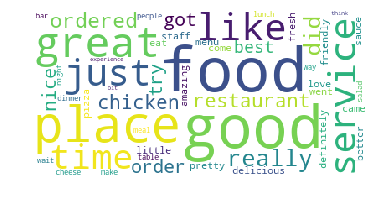

In [62]:
wordcloud = WordCloud(background_color="white")
wordcloud.fit_words(dict(med_wc_list))

fig=plt.figure(figsize=(6, 4))   # Prepare a plot 5x3 inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

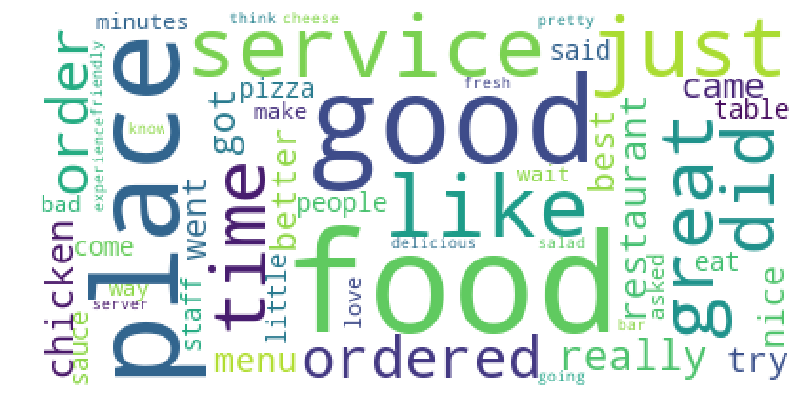

In [63]:
wordcloud = WordCloud(background_color="white")
wordcloud.fit_words(dict(hard_wc_list))

fig=plt.figure(figsize=(15, 7))   # Prepare a plot 5x3 inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Taking alternative approach to WordClouds using Tfidf scores

In [64]:
def normalize(text):
#     punct = '[\\!\\"\\#\\$\\%\\&\\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\{\\|\\}\\~0-9\\r\\t\\n]'
#     text = text.lower()
#     punct_regex = re.compile(punct)
#     not_regex = re.compile("(n\\'t)")
#     text = not_regex.sub(' not', text)
#     words = punct_regex.sub(" ", text).split()
    
    words = [str(tb(w).correct()) for w in text.split()]# if len(w) > 2 if w not in stop_words]
#     words = [w for w in words if len(w) > 2 if w not in stop_words]
    
    return ' '.join(words)

In [65]:
def plot_tfidf_word_cloud(text):
    vectorizer = TfidfVectorizer(input='content',
                                 ngram_range=(2,2),
                                 max_df=0.98)

    tfidf = vectorizer.fit_transform(text)

    scores = zip(vectorizer.get_feature_names(),np.asarray(tfidf.sum(axis=0)).ravel())
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    
    wordcloud = WordCloud(background_color="white")
    wordcloud.fit_words(dict(scores[0:50]))

    fig=plt.figure(figsize=(15,9))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [66]:
input_json = "../df_by_usr.json"
with open(input_json, 'r') as f:
    data = f.readlines()
    data = list(map(json.loads, data))
    
df_by_usr = pd.DataFrame(data)

In [68]:
hardest = df_by_usr[df_by_usr.avg_star_delta < -2.3].text_agg.apply(lambda x: normalize(x))

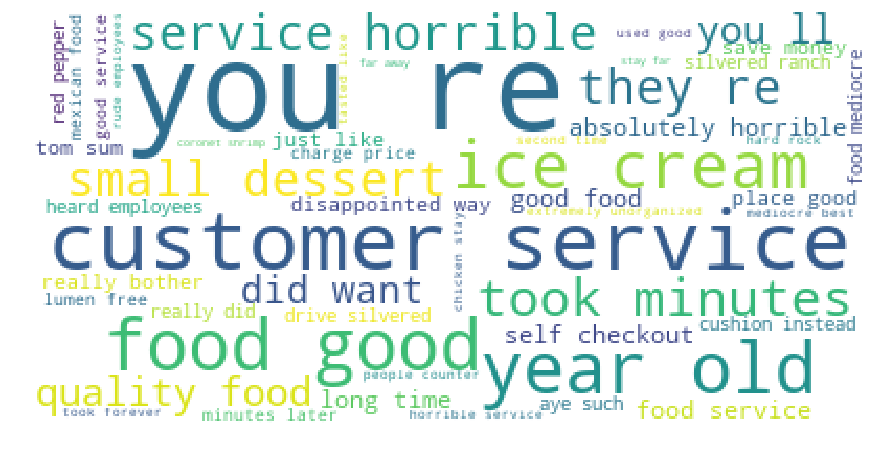

In [69]:
plot_tfidf_word_cloud(hardest)

In [70]:
easiest = df_by_usr[df_by_usr.avg_star_delta > 1.5].text_agg.apply(lambda x: normalize(x))

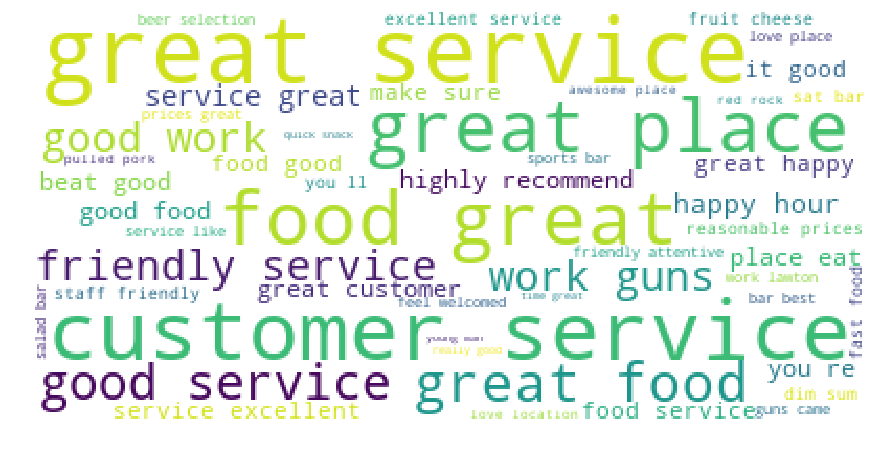

In [71]:
plot_tfidf_word_cloud(easiest)

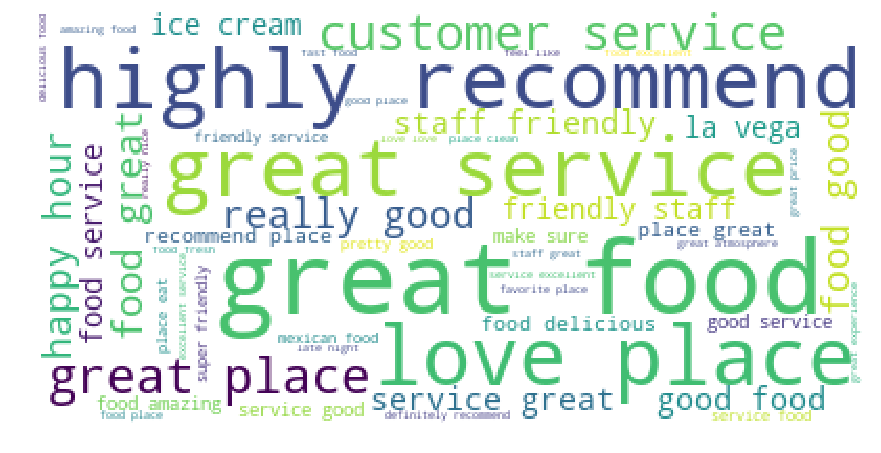

In [40]:
input_json = "../df_by_usr.json"
with open(input_json, 'r') as f:
    data = f.readlines()
    data = list(map(json.loads, data))

df_by_usr= pd.DataFrame(data)

vectorizer = TfidfVectorizer(input='content',
                             ngram_range=(2,2),
                             stop_words='english',
                             max_df=0.98)

tfidf = vectorizer.fit_transform(df_by_usr[df_by_usr.avg_star_delta > 1].text_agg)
scores = zip(vectorizer.get_feature_names(),np.asarray(tfidf.sum(axis=0)).ravel())
scores = sorted(scores, key=lambda x: x[1], reverse=True)

wordcloud = WordCloud(background_color="white")
wordcloud.fit_words(dict(scores[0:50]))

fig=plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

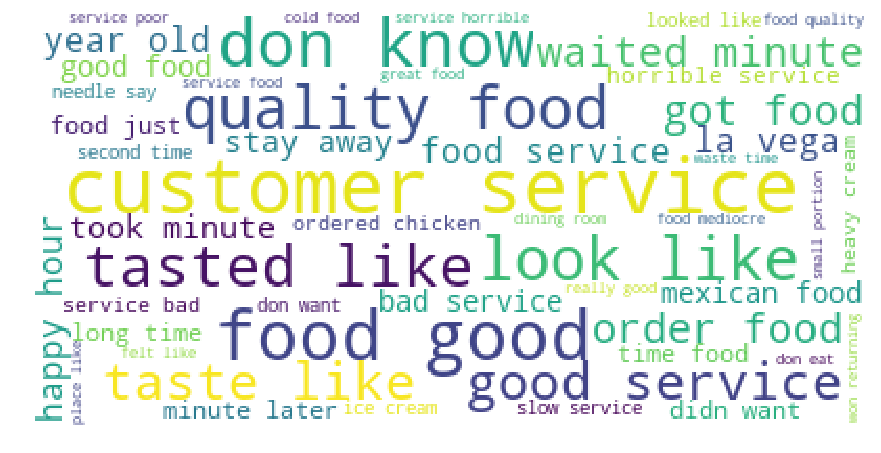

In [93]:
vectorizer = TfidfVectorizer(input='content',
                             ngram_range=(2,2),
                             toke
#                              stop_words='english',
                             max_df=0.98)

tfidf = vectorizer.fit_transform(df_by_usr[df_by_usr.avg_star_delta < -2].text_agg)
scores = zip(vectorizer.get_feature_names(),np.asarray(tfidf.sum(axis=0)).ravel())
scores = sorted(scores, key=lambda x: x[1], reverse=True)

wordcloud = WordCloud(background_color="white")
wordcloud.fit_words(dict(scores[0:50]))

fig=plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()